In [148]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

# Import Data

In [149]:
df = pd.read_csv("Salinan Online Retail Data.csv")
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


In [150]:
def info(df):
    print(df.info())
    print(df.describe())
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB
None
            quantity          price    customer_id
count  461773.000000  461773.000000  360853.000000
mean        9.088892       4.569963   15557.611138
std        86.366467     153.411566    1593.728741
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   14210.000000
50%         3.000000       2.100000   15580.000000
75%        10.000000       4.210000   16938.000000
max     10200.0000

# Data Cleansing

In [151]:
# Remove null values
df = df[~df['product_name'].isna()]
df = df[~df['customer_id'].isna()]

# Change dtype
df['order_date'] = df['order_date'].astype('datetime64[ns]')
df['customer_id'] = df['customer_id'].astype('str')

# Remove test product
df = df[(~df['product_code'].str.contains('TEST'))|(~df['product_name'].str.contains('test'))]

# Change quantity into absolute value
df['quantity'] = df['quantity'].abs()

# Add new column
df['amount'] = df['quantity'] * df['price']

# Remove Outliers
df = df[(abs(stats.zscore(df[['quantity','amount']]) < 3).all(axis=1))]

df = df.reset_index(drop=True)

In [152]:
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id,amount
0,C493411,21539,RETRO SPOTS BUTTER DISH,1,2010-01-04 09:43:00,4.25,14590.0,4.25
1,493414,21844,RETRO SPOT MUG,36,2010-01-04 10:28:00,2.55,14590.0,91.80
2,493414,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-04 10:28:00,4.25,14590.0,51.00
3,493414,37508,NEW ENGLAND CERAMIC CAKE SERVER,2,2010-01-04 10:28:00,2.55,14590.0,5.10
4,493414,35001G,HAND OPEN SHAPE GOLD,2,2010-01-04 10:28:00,4.25,14590.0,8.50
...,...,...,...,...,...,...,...,...
358477,539988,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,1,2010-12-23 16:06:00,1.25,18116.0,1.25
358478,539988,84849D,HOT BATHS SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,1.69
358479,539988,84849B,FAIRY SOAP SOAP HOLDER,1,2010-12-23 16:06:00,1.69,18116.0,1.69
358480,539988,22854,CREAM SWEETHEART EGG HOLDER,2,2010-12-23 16:06:00,4.95,18116.0,9.90


In [153]:
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358482 entries, 0 to 358481
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      358482 non-null  object        
 1   product_code  358482 non-null  object        
 2   product_name  358482 non-null  object        
 3   quantity      358482 non-null  int64         
 4   order_date    358482 non-null  datetime64[ns]
 5   price         358482 non-null  float64       
 6   customer_id   358482 non-null  object        
 7   amount        358482 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 21.9+ MB
None
            quantity                     order_date          price   
count  358482.000000                         358482  358482.000000  \
mean        9.362626  2010-07-22 07:40:25.711918592       3.087522   
min         1.000000            2010-01-04 09:43:00       0.000000   
25%         2

In [154]:
df_user = df.groupby('customer_id',as_index=False).agg(order_cnt=('order_id','nunique'),latest_buy=('order_date','max'),total_amount=('amount','sum'))
df_user['latest_buy'] = df_user['latest_buy'].dt.date
df_user['latest_buy'] = pd.to_datetime(df_user['latest_buy'])
df_user['days_since_latest_buy'] = (df_user['latest_buy'].max() - df_user['latest_buy']).dt.days
df_user

,customer_id,order_cnt,latest_buy,total_amount,days_since_latest_buy
0,12346.0,5,2010-10-04,602.40,80
1,12608.0,1,2010-10-31,415.79,53
2,12745.0,2,2010-08-10,723.85,135
3,12746.0,2,2010-06-30,266.35,176
4,12747.0,19,2010-12-13,4094.79,10
...,...,...,...,...,...
3884,18283.0,6,2010-11-22,641.77,31
3885,18284.0,2,2010-10-06,486.68,78
3886,18285.0,1,2010-02-17,427.00,309
3887,18286.0,2,2010-08-20,941.48,125


# Frequency Score

In [155]:
bins = [0,
        np.percentile(df_user['order_cnt'], 20),
        np.percentile(df_user['order_cnt'], 40),
        np.percentile(df_user['order_cnt'], 60),
        np.percentile(df_user['order_cnt'], 80),
        df_user['order_cnt'].max()]
labels = [1,2, 3, 4, 5]

df_user['frequency_score'] = pd.cut(x=df_user['order_cnt'], bins=bins, labels=labels,include_lowest=True, duplicates='drop').astype('int')
df_user

,customer_id,order_cnt,latest_buy,total_amount,days_since_latest_buy,frequency_score
0,12346.0,5,2010-10-04,602.40,80,4
1,12608.0,1,2010-10-31,415.79,53,1
2,12745.0,2,2010-08-10,723.85,135,2
3,12746.0,2,2010-06-30,266.35,176,2
4,12747.0,19,2010-12-13,4094.79,10,5
...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22,641.77,31,4
3885,18284.0,2,2010-10-06,486.68,78,2
3886,18285.0,1,2010-02-17,427.00,309,1
3887,18286.0,2,2010-08-20,941.48,125,2


# Recency Score

In [156]:
bins = [df_user['days_since_latest_buy'].min(),
        np.percentile(df_user['days_since_latest_buy'],20),
        np.percentile(df_user['days_since_latest_buy'],40),
        np.percentile(df_user['days_since_latest_buy'],60),
        np.percentile(df_user['days_since_latest_buy'],80),
        df_user['days_since_latest_buy'].max()]
labels = [5,4,3,2,1]
df_user['recency_score'] = pd.cut(x=df_user['days_since_latest_buy'],bins=bins,labels=labels,include_lowest=True).astype('int')
df_user

,customer_id,order_cnt,latest_buy,total_amount,days_since_latest_buy,frequency_score,recency_score
0,12346.0,5,2010-10-04,602.40,80,4,2
1,12608.0,1,2010-10-31,415.79,53,1,3
2,12745.0,2,2010-08-10,723.85,135,2,2
3,12746.0,2,2010-06-30,266.35,176,2,1
4,12747.0,19,2010-12-13,4094.79,10,5,5
...,...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22,641.77,31,4,4
3885,18284.0,2,2010-10-06,486.68,78,2,2
3886,18285.0,1,2010-02-17,427.00,309,1,1
3887,18286.0,2,2010-08-20,941.48,125,2,2


# User Segmentation

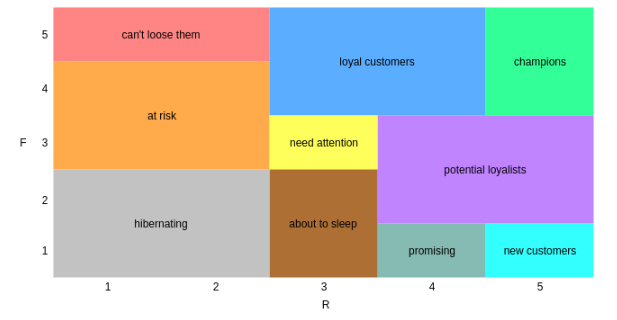

In [158]:
condlist = [(df_user['recency_score'] == 5) & (df_user['frequency_score'] >= 4),
            (df_user['recency_score'] >= 4) & (df_user['frequency_score'].between(2,3)),
            (df_user['recency_score'] == 5) & (df_user['frequency_score'] == 1),
            (df_user['recency_score'].between(3,4)) & (df_user['frequency_score'] >= 4),
            (df_user['recency_score'] == 3) & (df_user['frequency_score'] == 3),
            (df_user['recency_score'] == 3) & (df_user['frequency_score'] <= 2),
            (df_user['recency_score'] == 4) & (df_user['frequency_score'] == 1),
            (df_user['recency_score'] <= 2) & (df_user['frequency_score'] == 5),
            (df_user['recency_score'] <= 2) & (df_user['frequency_score'].between(3,4)),
            (df_user['recency_score'] <= 2) & (df_user['frequency_score'] <= 2)]
labels = ['Champions','Potential Loyalist','New Customer','Loyal Customer','Need Attention','About to Sleep','Promising',"Can't Loose Them", 'At Risk', 'Hibernating']
df_user['segment'] = np.select(condlist=condlist,choicelist=labels)
df_user

,customer_id,order_cnt,latest_buy,total_amount,days_since_latest_buy,frequency_score,recency_score,segment
0,12346.0,5,2010-10-04,602.40,80,4,2,At Risk
1,12608.0,1,2010-10-31,415.79,53,1,3,About to Sleep
2,12745.0,2,2010-08-10,723.85,135,2,2,Hibernating
3,12746.0,2,2010-06-30,266.35,176,2,1,Hibernating
4,12747.0,19,2010-12-13,4094.79,10,5,5,Champions
...,...,...,...,...,...,...,...,...
3884,18283.0,6,2010-11-22,641.77,31,4,4,Loyal Customer
3885,18284.0,2,2010-10-06,486.68,78,2,2,Hibernating
3886,18285.0,1,2010-02-17,427.00,309,1,1,Hibernating
3887,18286.0,2,2010-08-20,941.48,125,2,2,Hibernating


Index(['Hibernating', 'Champions', 'Loyal Customer', 'Potential Loyalist',
       'At Risk', 'About to Sleep', 'Need Attention', 'Promising',
       'Can't Loose Them', 'New Customer'],
      dtype='object', name='segment')

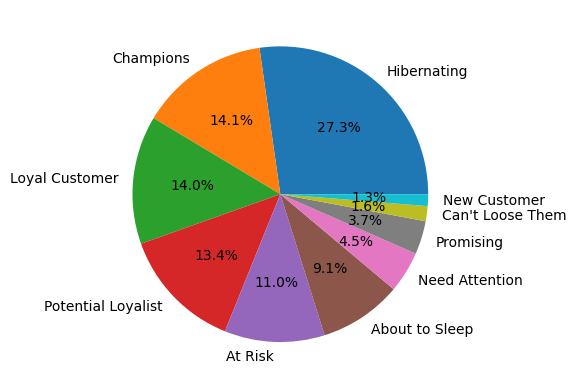

segment
Hibernating           1060
Champions              550
Loyal Customer         546
Potential Loyalist     523
At Risk                426
About to Sleep         352
Need Attention         176
Promising              142
Can't Loose Them        64
New Customer            50
Name: count, dtype: int64

In [173]:
plt.pie(df_user['segment'].value_counts(),labels=df_user['segment'].value_counts().index,autopct='%1.1f%%')
plt.show()
df_user['segment'].value_counts()